Objective:
The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.

Tools and Libraries:

●	Data manipulation libraries

●	Data visualization libraries (Matplotlib and Seaborn in Python)


#1.	Data Cleaning and Preparation:
●	Load the dataset into a DataFrame or equivalent data structure.

●	Handle missing values appropriately (e.g., imputation, deletion).

●	Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

●	Detect and treat outliers if necessary.


In [28]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # any library will give you future warnings regarding updates in functions. To ignore it write this line
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5) # RuntimeConfiguration Parameters: size of graph, 10:width, 5:height
plt.rcParams['figure.dpi'] = 300 # Resolution dots per inches

In [29]:
#loading data to dataframe
data =pd.read_csv("Cardiotocographic.csv")

In [30]:
data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [31]:
#Handle missing values appropriately (e.g., imputation, deletion).
data.isnull().sum() # display count of missing values in each column


,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


In [32]:
data.dtypes
#No inconsistencies in data types- all are float64
#No categorical data types were found

,0
LB,float64
AC,float64
FM,float64
UC,float64
DL,float64
DS,float64
DP,float64
ASTV,float64
MSTV,float64
ALTV,float64


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


Missing Value Imputation
**Reasons of missing values:**

*   Data entry errors
*   Issues with machines
*   Improper data handling, etc.

**Identify Missing Values**

*   Visualize missing data: Use tools like heatmaps or bar plots to identify the extent of missing data.
*   Summarize missing data: Use functions like df.isnull().sum() in pandas to get a count of missing values in each column.

**Treatment**

*   0 to 5 % missing values: drop rows using df.dropna()
*   6 to 45 %: replace the missing values with the mean (for normally distributed data), median (for skewed data), or mode (for categorical-like numeric data).
*   50% drop column using df.dropna(axis=1). For numerical columns where dropping rows is not ideal.



In [34]:
#data.isnull().sum() # display count of missing values in each column
#data.isnull() # or isnull(), True: missing value
(data.isnull().sum()/(len(data)))*100 #% of missing values


,0
LB,0.987770
AC,0.940734
FM,0.000000
UC,0.000000
DL,0.000000
DS,0.987770
DP,0.987770
ASTV,0.000000
MSTV,0.000000
ALTV,0.000000


Here, we can conclude that the missing value percentage is <1% in LB, AC, DS, DP, MLTV, Width, Tendency, NSP.

<Axes: >

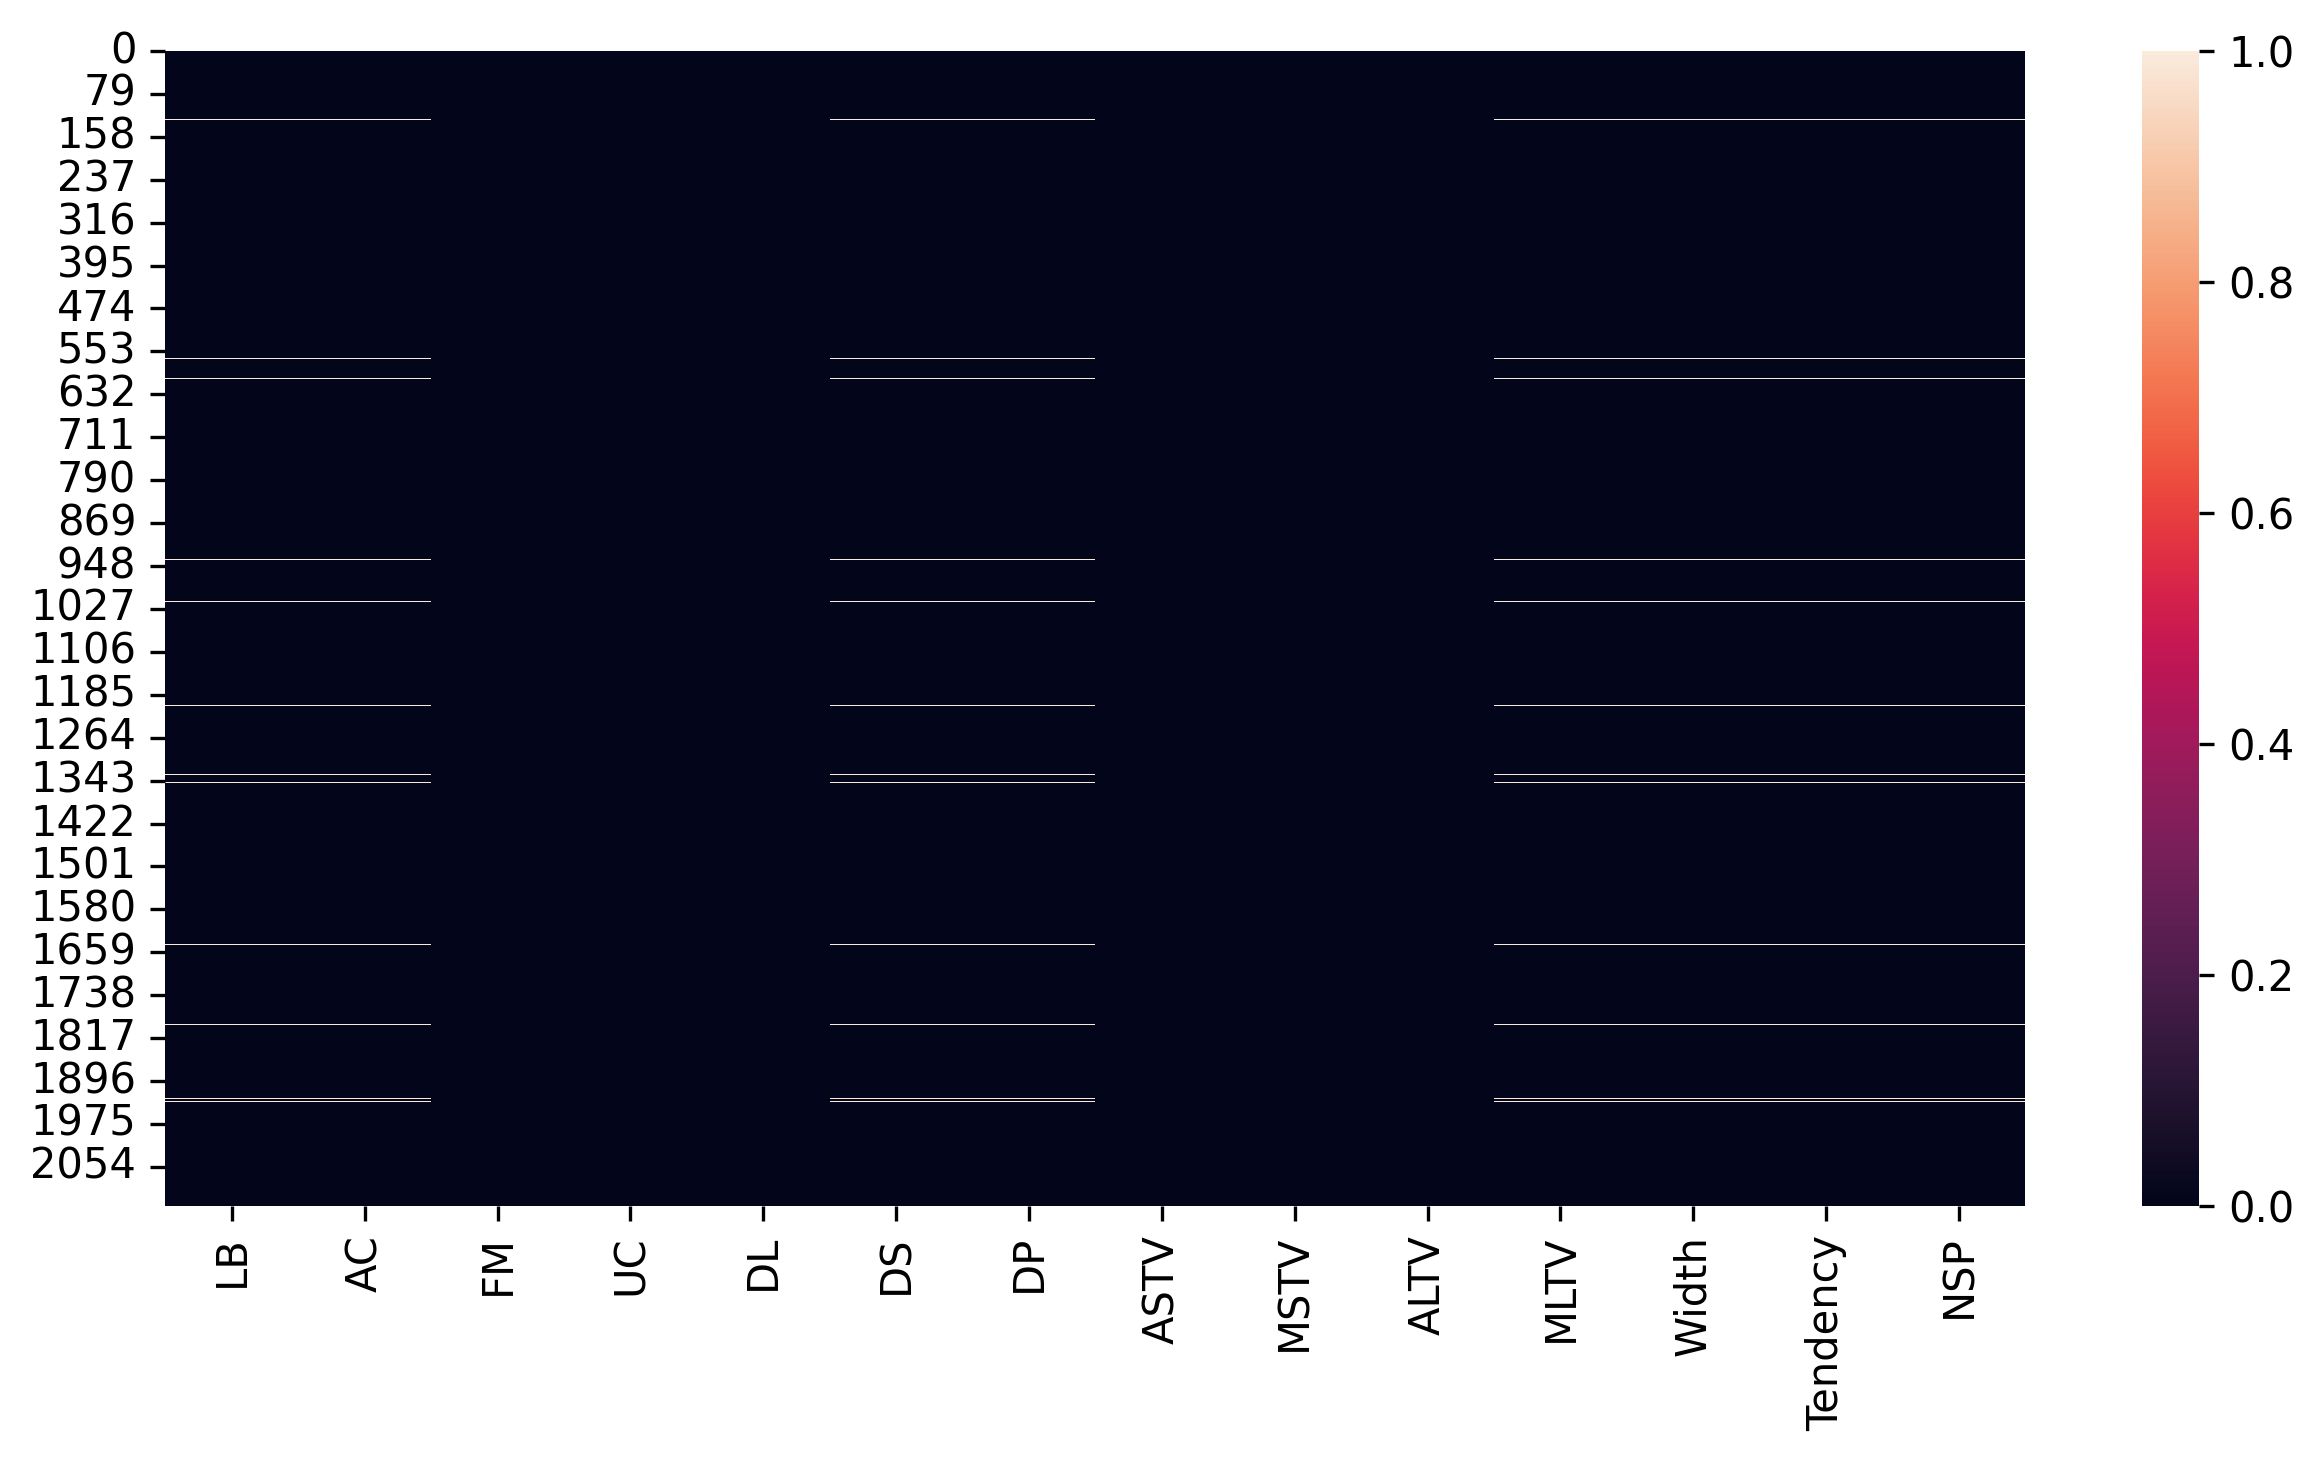

In [35]:
# visualize missing values
sns.heatmap(data.isna()) # white horizontal lines are missing values

In [36]:
#we don't have any missing values in FM,UC,DL,ASTV,MSTV,ALTV columns
#The missing values in the remaining colums are between 0 to 5%, so we can remove the rows. But here we are filling the missing values with median to avaoid impact on calculations
data_cleaned=data.copy()
for i in data.columns:
    data_cleaned[i].fillna(data_cleaned[i].median(),inplace=True) #Replacing null values with median
data_cleaned.isna().sum()
data_cleaned.shape

(2126, 14)

<Axes: >

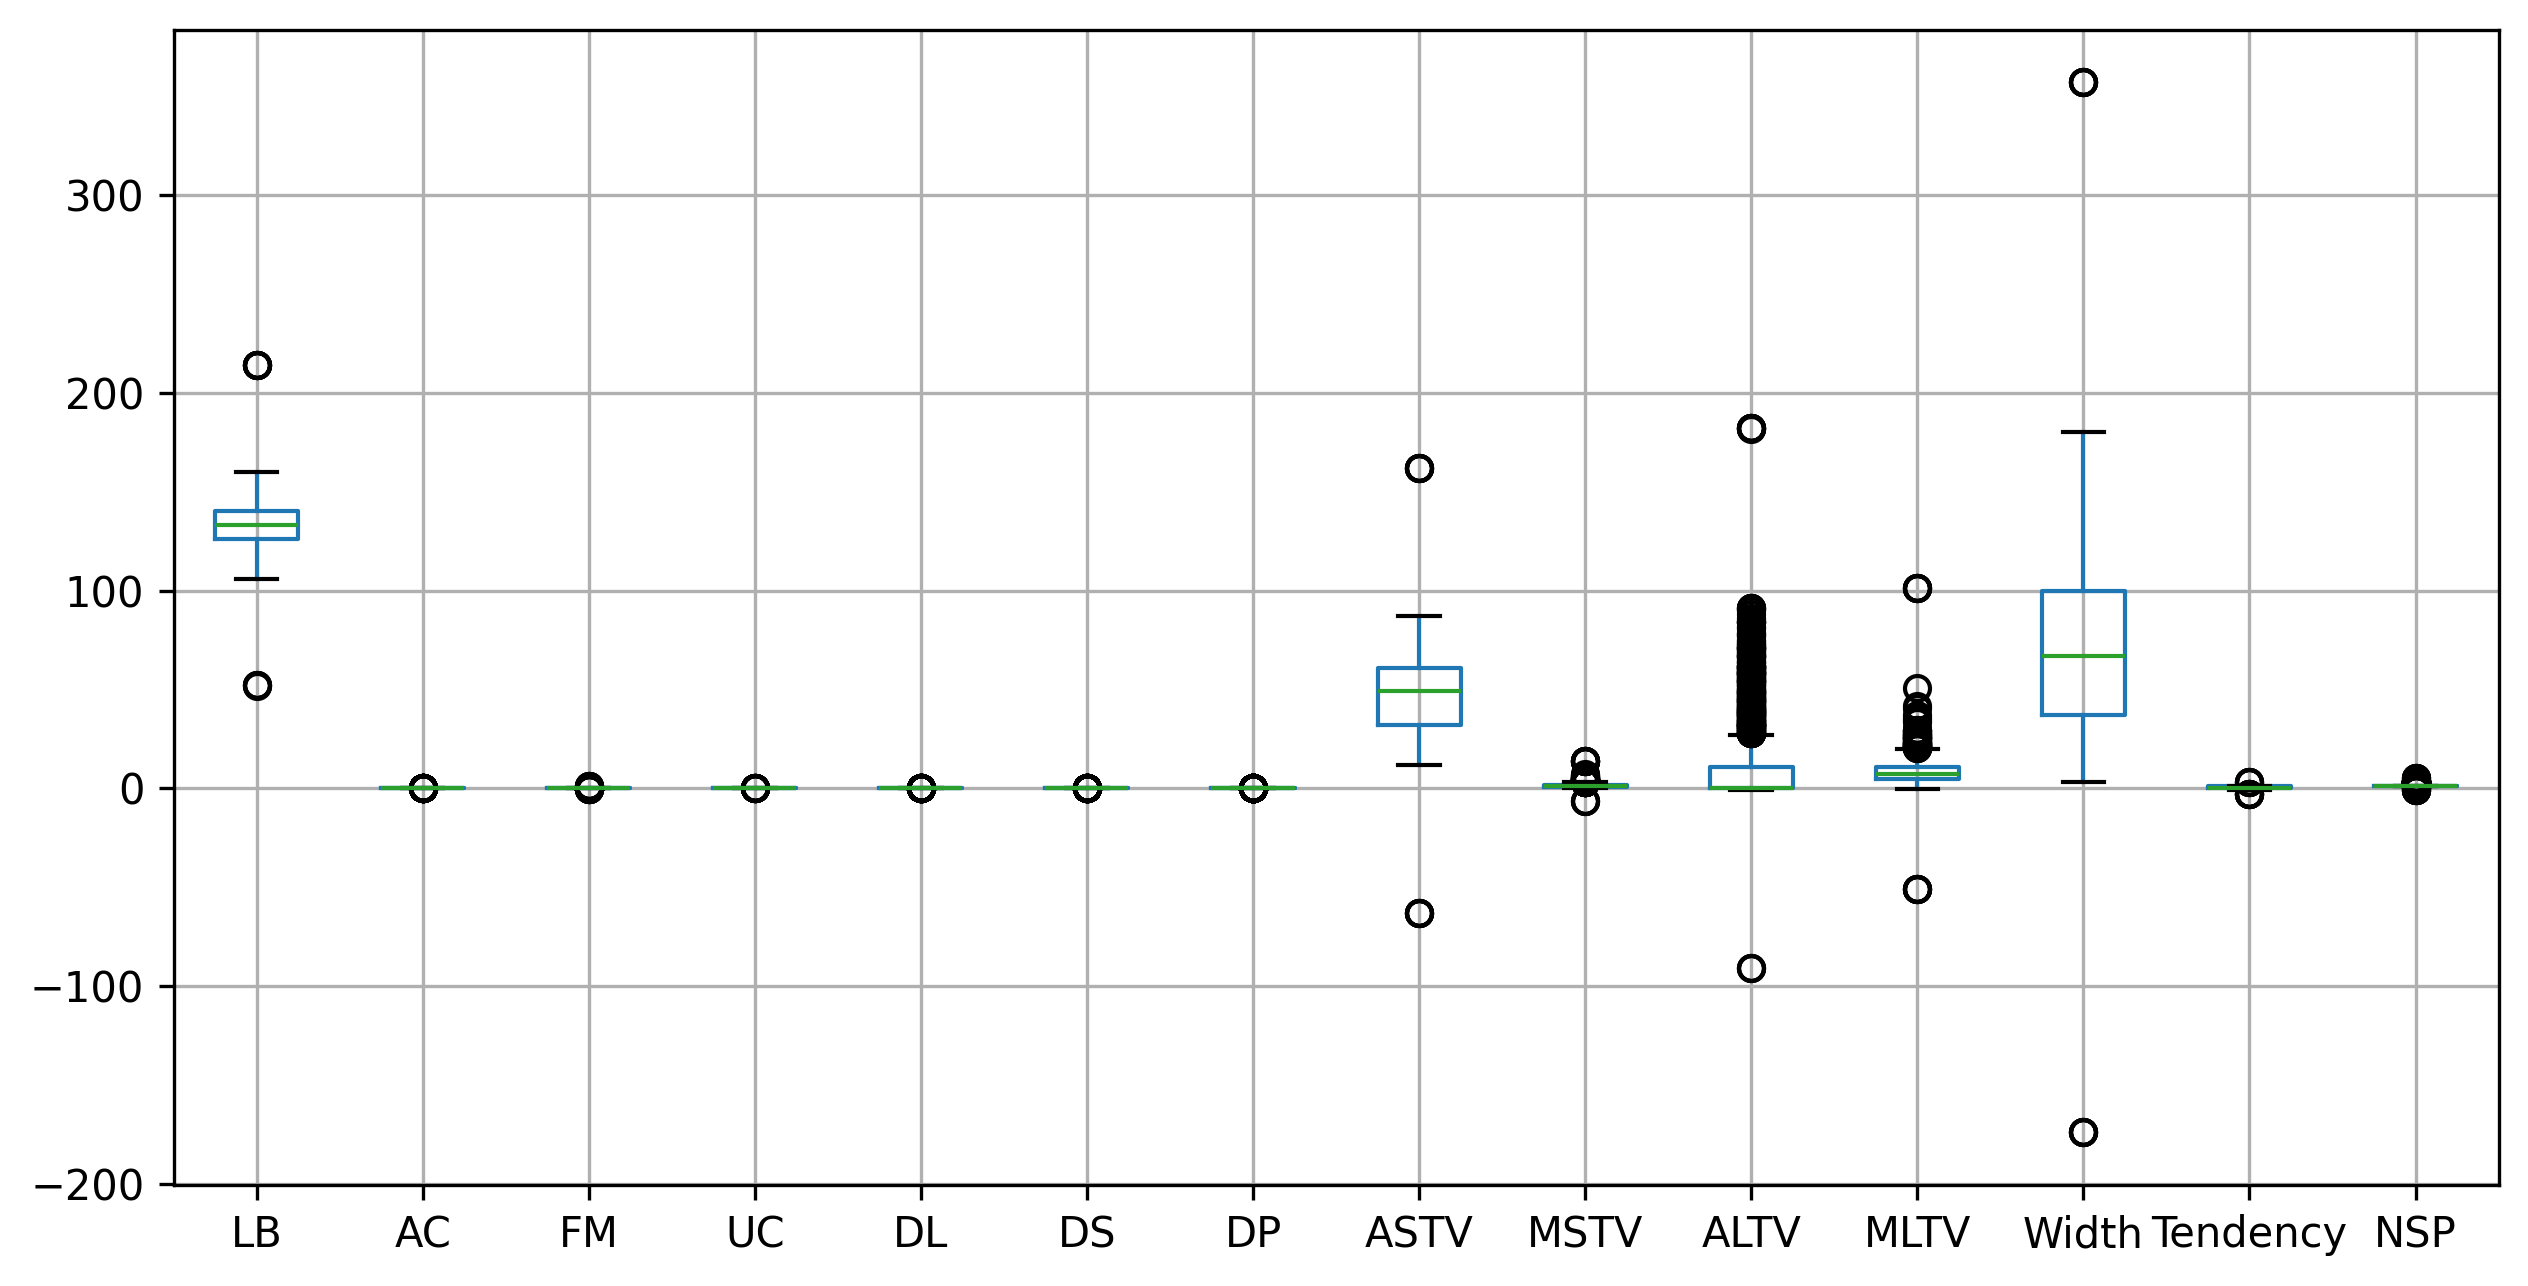

In [37]:
data_cleaned.boxplot()

Based on the above graph, we can determine that LB, ASTV, MSTV, ALTV, MLTV,Width and Tendency columns have outliers

In [38]:
# Detect and handle outliers (Using IQR method)
for col in data_cleaned.select_dtypes(include=np.number).columns:
    Q1 = data_cleaned[col].quantile(0.25) #first quantile
    Q3 = data_cleaned[col].quantile(0.75) # second quantile
    IQR = Q3 - Q1 # IQR calcluation
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # print(col,lower_bound,upper_bound)
    outliers = data_cleaned[(data_cleaned[col] < lower_bound) | (data_cleaned[col] > upper_bound)] #storing outliers in outliers dataframe
    # print(outliers)
    data_cleaned = data_cleaned[(data_cleaned[col] >= lower_bound) & (data_cleaned[col] <= upper_bound)] #removing the outliers in the dataset

data_cleaned.shape #to undersatnd how many rows were removed to clean the dataset.

(917, 14)

In [39]:
data_cleaned.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.0,917.0,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.0
mean,132.198962,0.003866,0.000586,0.004902,0.001529,0.0,0.0,42.988288,1.221960,4.407001,8.420946,65.746068,0.342449,1.0
std,9.315219,0.003710,0.001308,0.002679,0.002263,0.0,0.0,15.164262,0.502493,8.350133,4.325025,31.175068,0.580383,0.0
min,106.000000,-0.000122,-0.002076,-0.000101,-0.000124,0.0,0.0,15.000000,0.200000,-0.899870,-0.136053,12.000000,-1.006614,1.0
25%,125.000000,0.000000,0.000000,0.003140,0.000000,0.0,0.0,29.000000,0.800000,0.000000,5.607756,39.000000,0.000000,1.0
50%,133.000000,0.002985,0.000000,0.004988,0.000000,0.0,0.0,42.000000,1.200000,0.000000,8.200000,60.000000,0.000000,1.0
75%,139.000000,0.006494,0.000168,0.006832,0.002762,0.0,0.0,56.000000,1.500000,5.000000,11.000000,90.607055,1.000000,1.0
max,160.000000,0.013861,0.006272,0.012072,0.008454,0.0,0.0,81.000000,2.700000,37.000000,19.600000,163.000000,1.023635,1.0


<Axes: >

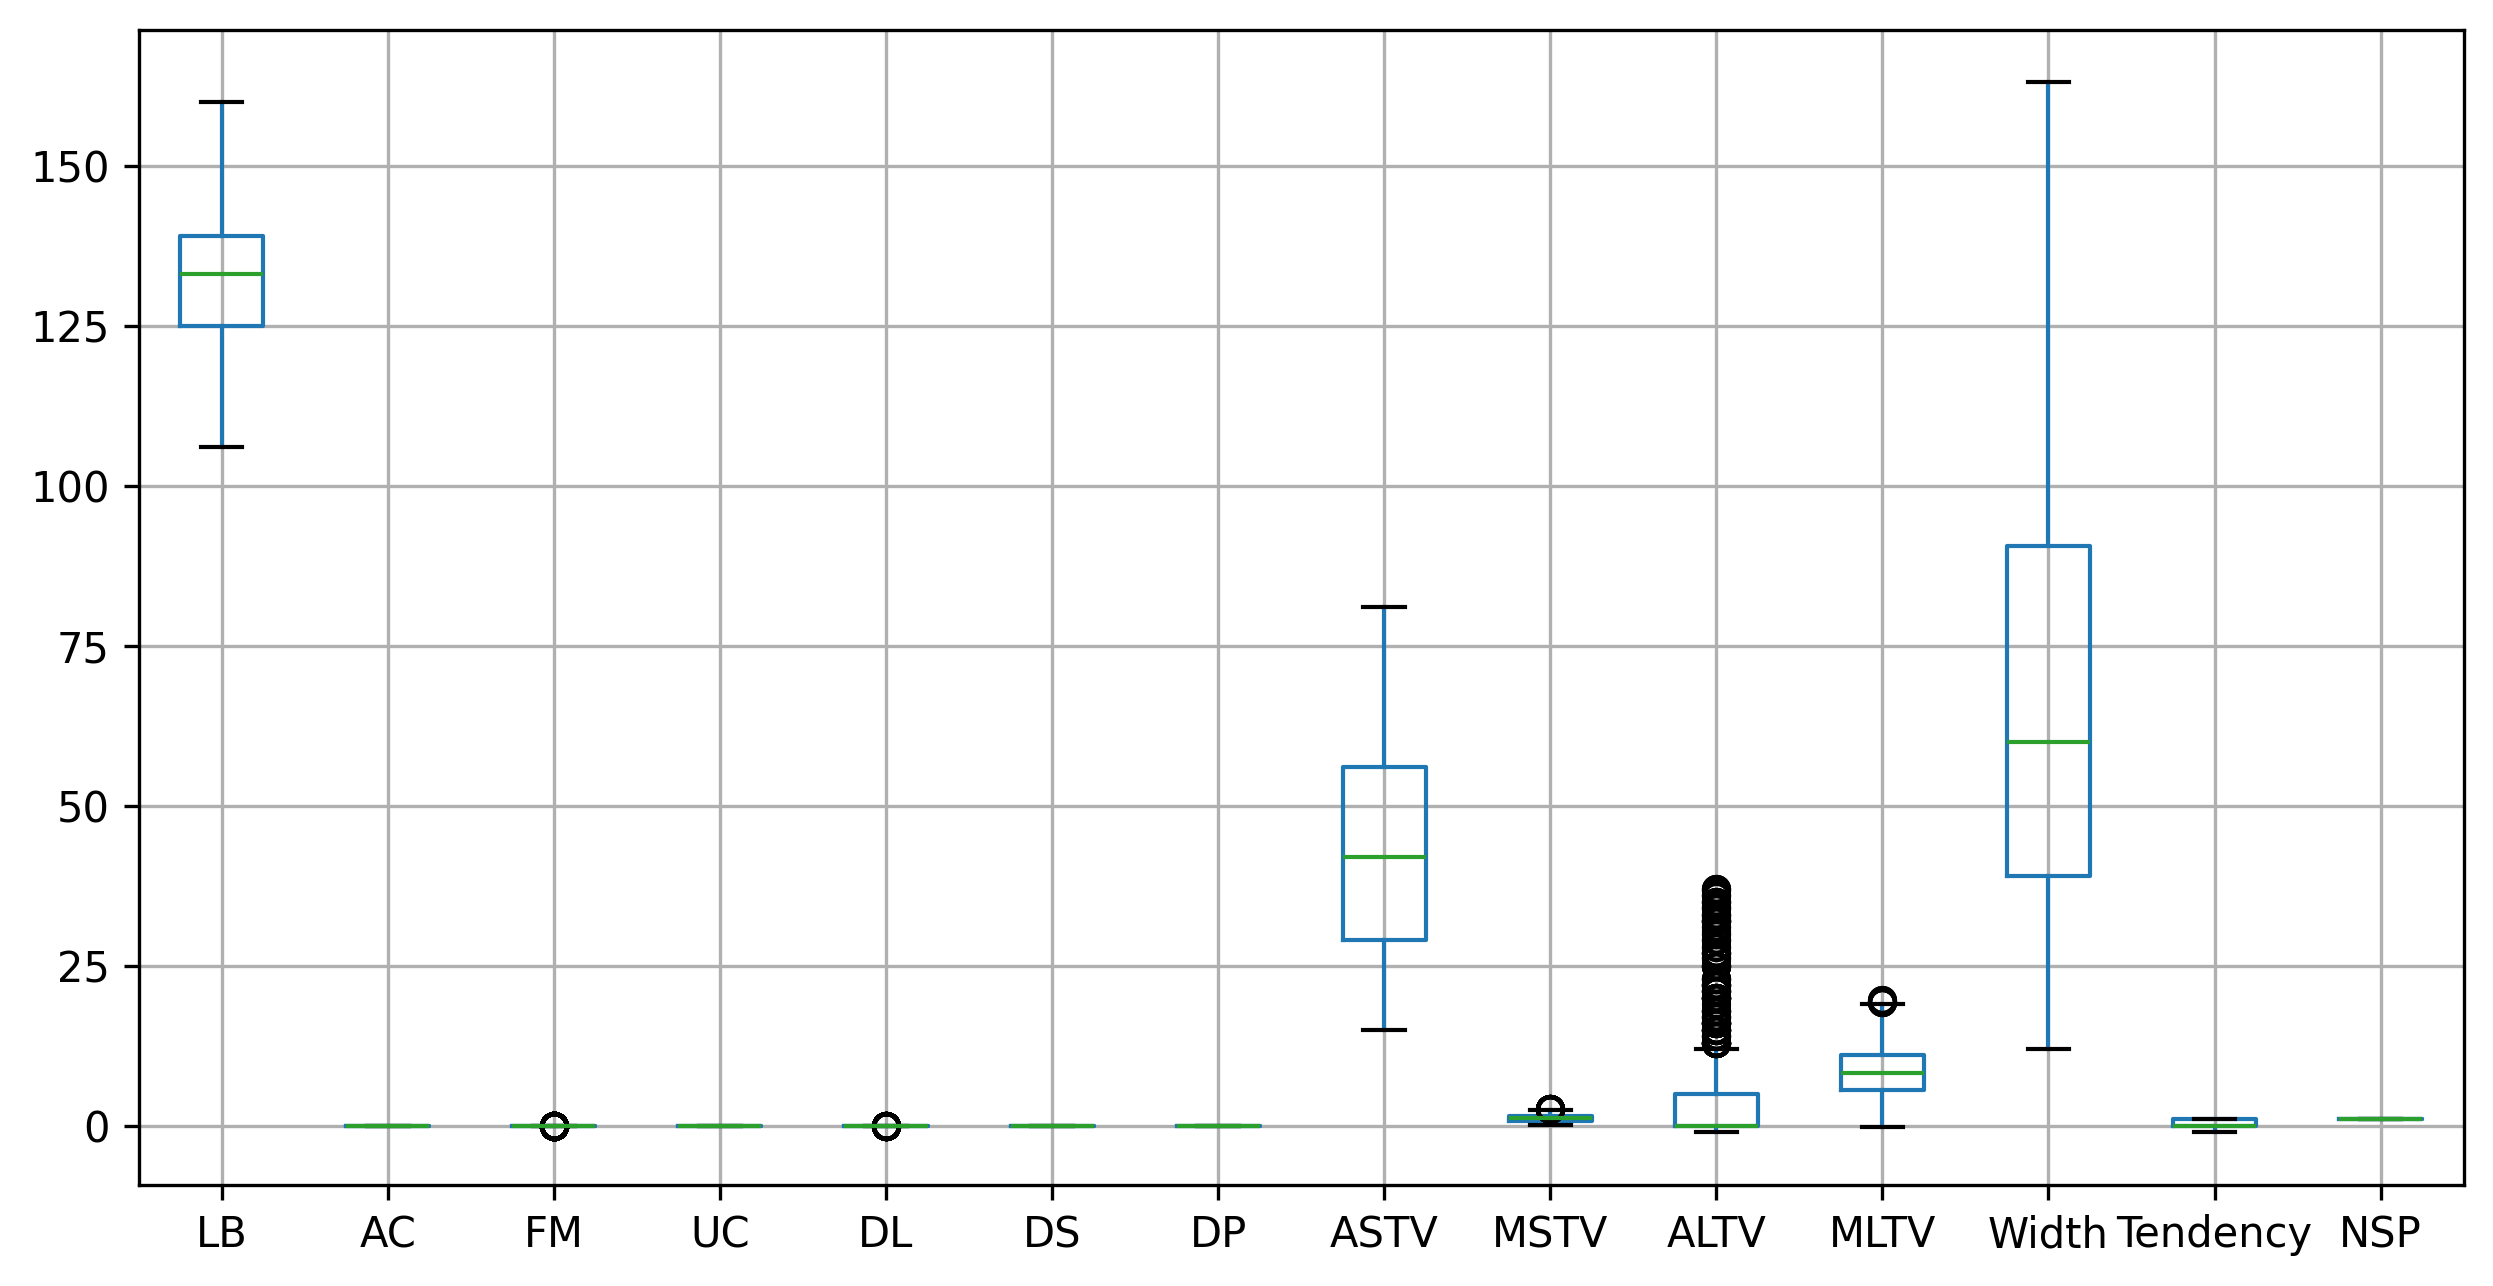

In [40]:
data_cleaned.boxplot()


Skewness:
Skewness measures the degree of asymmetry in a distribution.

1. Positive Skewness (Right Skewed): If skewness > 0
The tail on the right side is longer or fatter than the left side.
Most of the data is concentrated on the left side.
The mean is typically greater than the median.
2. Negative Skewness (Left Skewed): If skewness < 0
The tail on the left side is longer or fatter than the right side.
Most of the data is concentrated on the right side.
The mean is typically less than the median.
3. Zero Skewness (Symmetric): If skewness ≈ 0
The data is evenly distributed around the mean.
The left and right sides of the distribution are balanced.


In [41]:
#sns.boxplot(x = data_cleaned['LB'])
data_cleaned.skew()
#for i in data_cleaned.skew():
#  if i>0:print('P')
#  elif i<0:print('N')
#  else: print('Z')

,0
LB,-0.131878
AC,0.718562
FM,2.229867
UC,-0.085515
DL,1.350732
DS,0.000000
DP,0.000000
ASTV,0.161387
MSTV,0.533573
ALTV,2.196407


#2.	Statistical Summary:

●	Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

●	Highlight any interesting findings from this summary.


In [42]:
data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [43]:
data_cleaned.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.0,917.0,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.0
mean,132.198962,0.003866,0.000586,0.004902,0.001529,0.0,0.0,42.988288,1.221960,4.407001,8.420946,65.746068,0.342449,1.0
std,9.315219,0.003710,0.001308,0.002679,0.002263,0.0,0.0,15.164262,0.502493,8.350133,4.325025,31.175068,0.580383,0.0
min,106.000000,-0.000122,-0.002076,-0.000101,-0.000124,0.0,0.0,15.000000,0.200000,-0.899870,-0.136053,12.000000,-1.006614,1.0
25%,125.000000,0.000000,0.000000,0.003140,0.000000,0.0,0.0,29.000000,0.800000,0.000000,5.607756,39.000000,0.000000,1.0
50%,133.000000,0.002985,0.000000,0.004988,0.000000,0.0,0.0,42.000000,1.200000,0.000000,8.200000,60.000000,0.000000,1.0
75%,139.000000,0.006494,0.000168,0.006832,0.002762,0.0,0.0,56.000000,1.500000,5.000000,11.000000,90.607055,1.000000,1.0
max,160.000000,0.013861,0.006272,0.012072,0.008454,0.0,0.0,81.000000,2.700000,37.000000,19.600000,163.000000,1.023635,1.0


**findings:**

#3. Data Visualization

Create histograms or boxplots to visualize the distributions of various numerical variables.

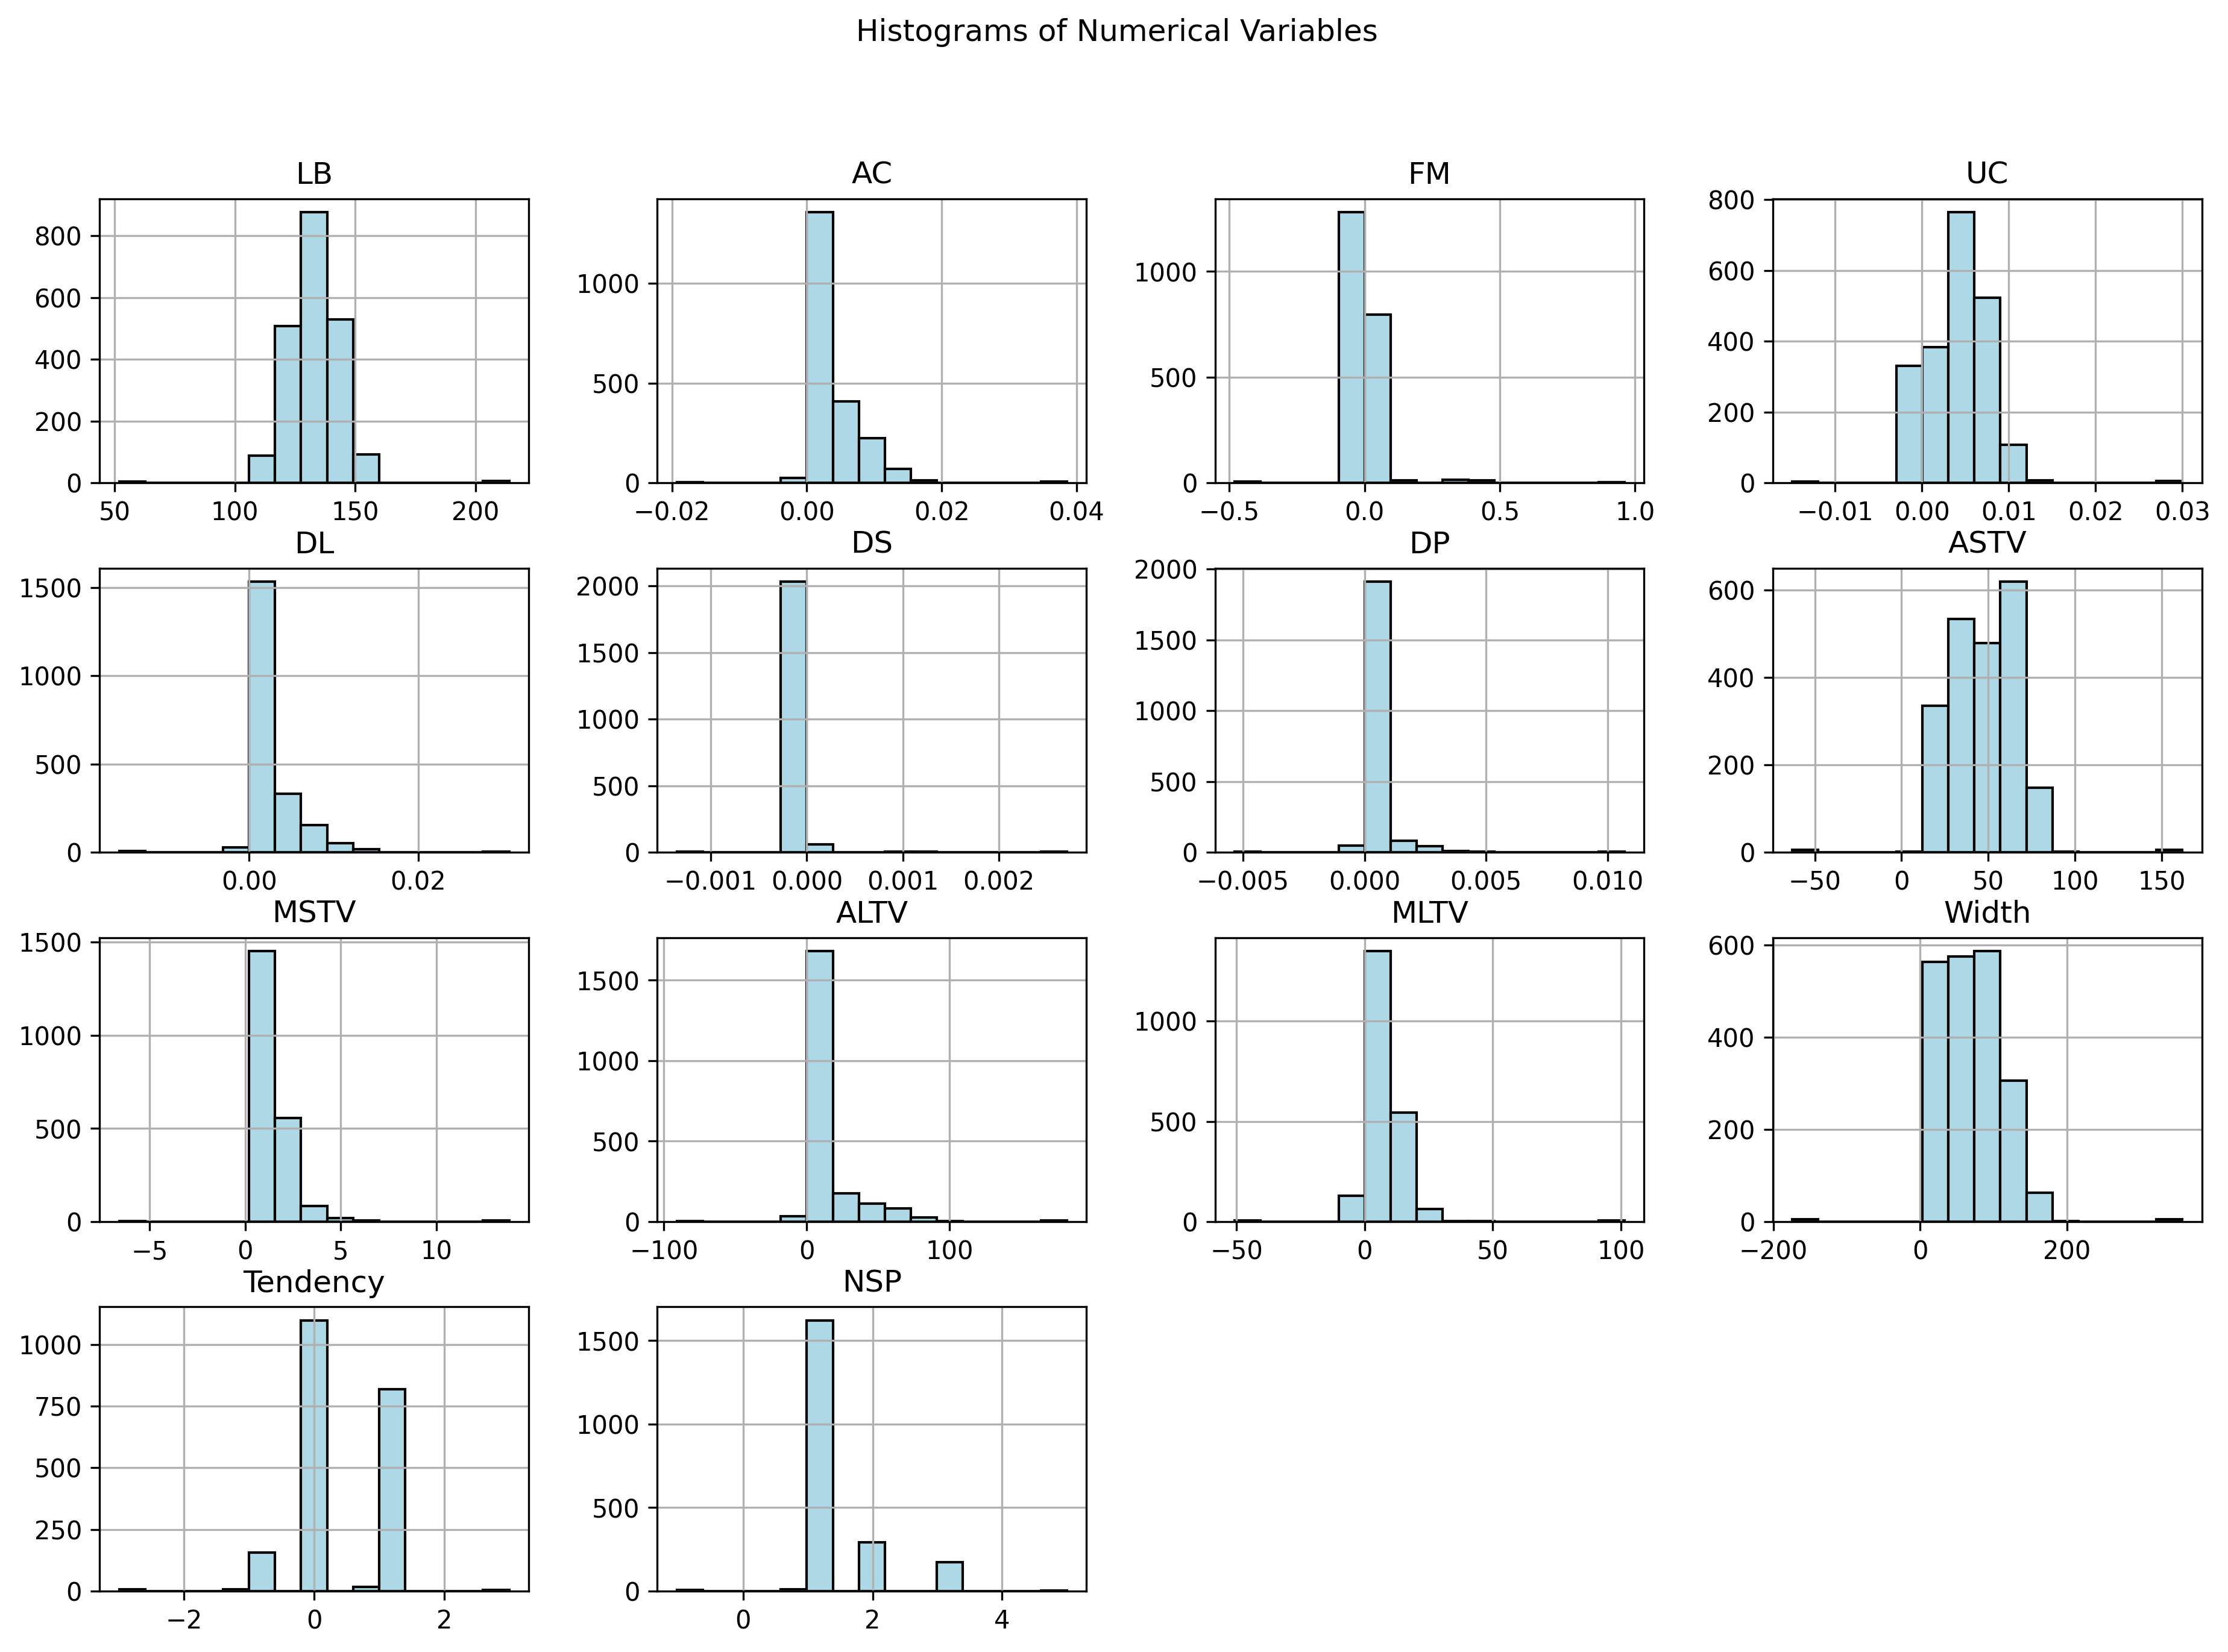

In [44]:
# Histograms for numerical variables on raw data set
data.hist(bins=15, figsize=(15, 10), color="lightblue", edgecolor="black")
plt.suptitle("Histograms of Numerical Variables")
plt.show()

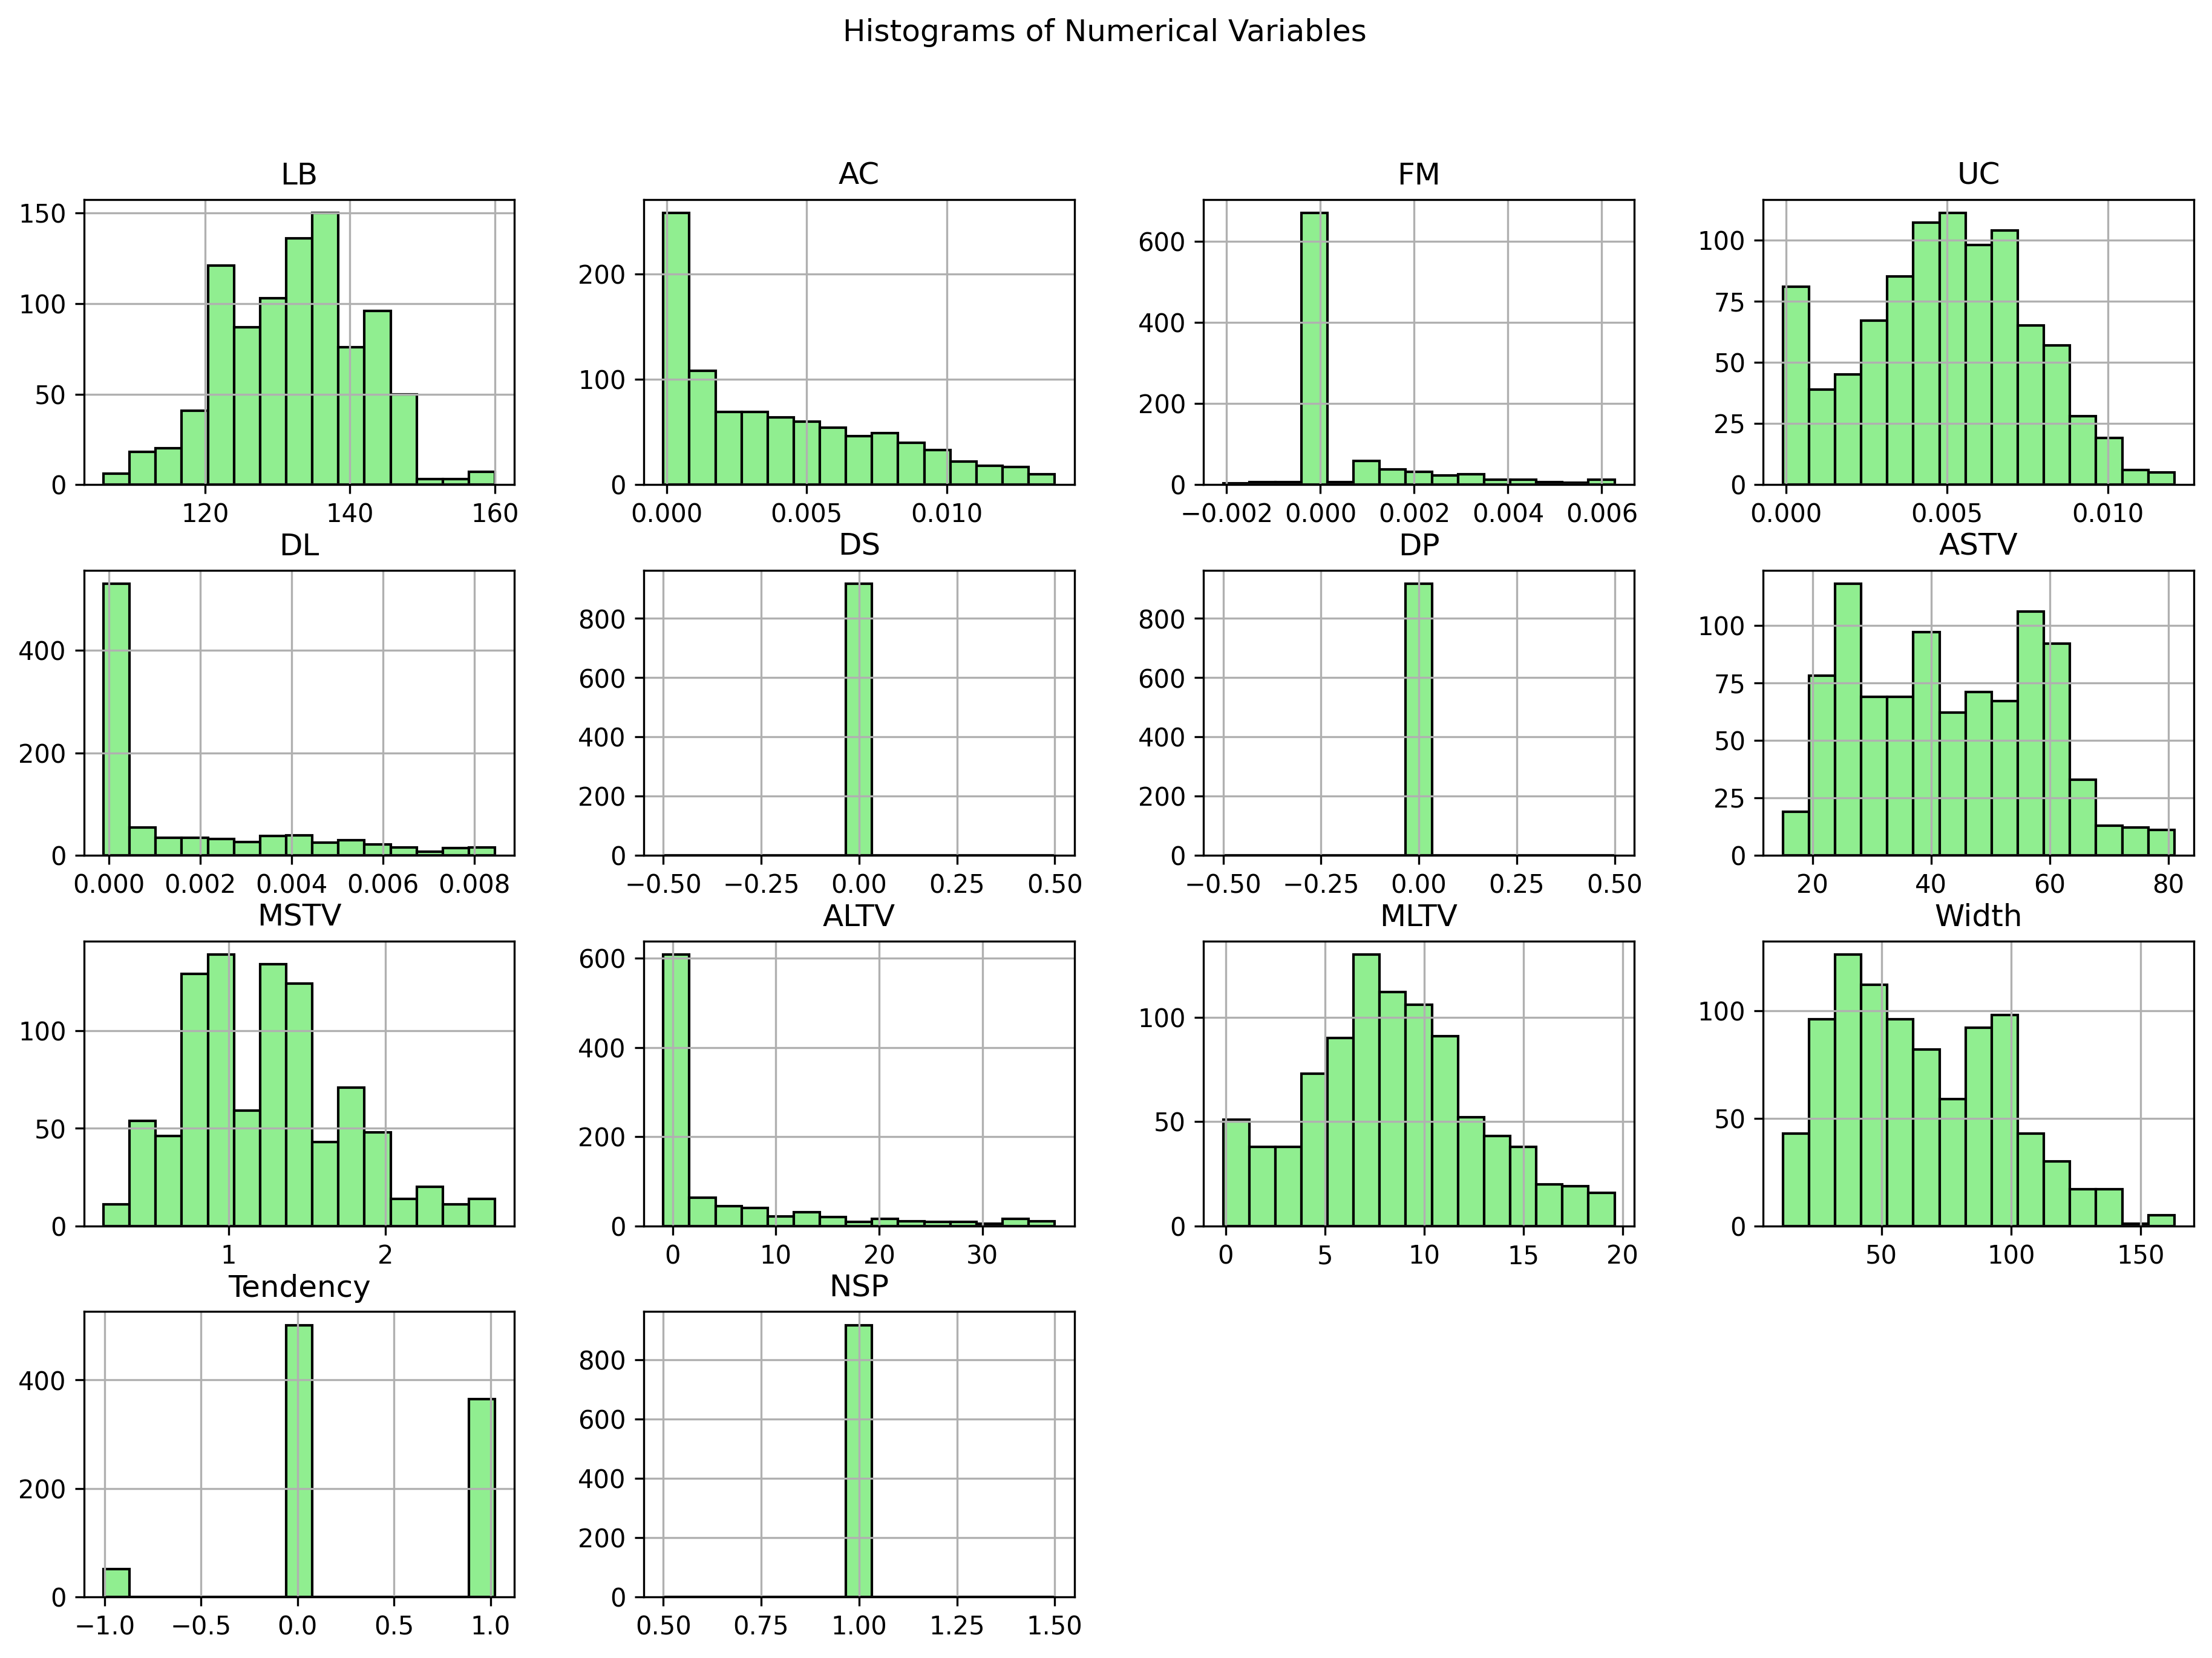

In [45]:
# Histograms for numerical variables on cleaned data set
data_cleaned.hist(bins=15, figsize=(15, 10), color="lightgreen", edgecolor="black")
plt.suptitle("Histograms of Numerical Variables")
plt.show()

Use bar charts or pie charts to display the frequency of categories for categorical variables.

In [46]:
data_cleaned['Tendency'].value_counts()


,count
Tendency,
0.000000,470
1.000000,351
-1.000000,47
-0.003180,1
-0.004069,1
-0.014736,1
-0.024380,1
0.028815,1
-0.009889,1


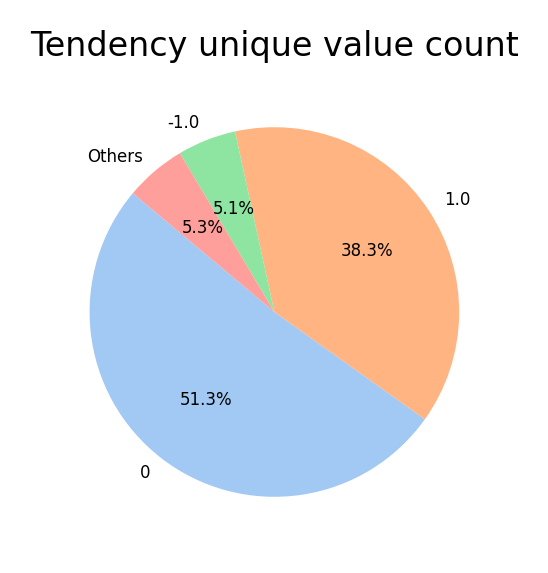

In [47]:
# Get value counts for the column Tendency
value_counts = data_cleaned['Tendency'].value_counts().tolist()
#as tendency column has value counts '0'-470, '1.0' - 351, '-1.0'- 47, all Others has 1. I have separated them and represented in pie chart
tendency_labels= ['0', '1.0', '-1.0', 'Others']
tendency_counts = value_counts[:3] + [sum(value_counts[3:])]

# Create a figure with a smaller size
fig, ax = plt.subplots(figsize=(3, 2))
# Create a pie chart
ax.pie(tendency_counts, labels=tendency_labels, autopct='%1.1f%%', startangle=140,colors=sns.color_palette("pastel"), textprops={'fontsize': 4})

# Add a title
ax.set_title('Tendency unique value count', fontsize=8)


# Display the chart
plt.show()

Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.

In [48]:
# Pairplot for relationships between variables on cleaned dataset
sns.pairplot(data_cleaned, diag_kind="kde", plot_kws={"alpha": 0.5})
plt.suptitle("Pairplot of Variables", y=1.02)
plt.show()

Generate scatter plots or correlation heatmaps to explore relationships between pairs of variables.

In [49]:
# Correlation heatmap for the cleaned data set
plt.figure(figsize=(10, 8))
corr = data_cleaned.corr().drop(index=['DS','DP','NSP'],columns=['DS','DP','NSP']) # correlation matrix of dataset. DS, DP, NSP columns has NaN values. Hence, we can remove them
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



In [50]:
threshold = 0.5  # Set a threshold for strong correlation
strong_correlations = corr[(corr > threshold) | (corr < -threshold)]
print("\nStrong Correlations (>|0.5|):")
display(strong_correlations)

#4.	Pattern Recognition and Insights:



Strongly Correlated :

1. Between Width and MSTV

***Interpretation:*** As the Width variable increases, the MSTV (Mean Short-Term Variability) also tends to increase.

***Implications:*** This might indicate a shared underlying factor influencing both measures, such as fetal health or stress conditions affecting variability patterns.


2. Between Width and DL

***Interpretation:*** As Width increases, DL (Late Decelerations) also increases.

***Implications:*** Late decelerations, which might indicate fetal distress, could be associated with a broader or more variable range of the signal (Width).
This suggests that increased variability or larger ranges in the measurement are linked to more pronounced deceleration patterns.

3. Between MSTV and DL

***Interpretation:*** As MSTV increases, DL also tends to increase.

***Implications:*** Higher mean short-term variability (MSTV) might accompany a greater occurrence or severity of late decelerations (DL).
This could indicate a complex interaction where variability in the fetal heart rate is related to late deceleration events, possibly reflecting physiological stress or a compensatory mechanism.






Moderate Correlation :

1. Moderate Correlation Between LB and Tendency

***Interpretation:*** As LB (Baseline Fetal Heart Rate) changes, the Tendency (a measure that could represent the direction or rate of change in fetal heart rate patterns) also shows a related trend.
***Implications:*** This suggests that a higher or lower baseline fetal heart rate may be moderately associated with the directional trend or consistency of the heart rate changes over time.

For example, a higher baseline rate might be linked with an upward tendency in fetal heart rate, or a lower baseline rate might indicate a downward trend.

Clinically, it may indicate underlying fetal conditions or stress factors that influence both the baseline and how the heart rate varies over time.

2. Moderate Correlation Between FM and ASTV

***Interpretation:*** As FM (Fetal Movements) increase or decrease, ASTV (Percentage of Time with Abnormal Short-Term Variability) tends to moderately increase or decrease as well.

***Implications:*** A relationship between fetal movement and variability suggests that increased movements might be associated with more frequent abnormal short-term variability, or vice versa.

This insight could be important for understanding fetal behavior and well-being.

3. Moderate Correlation Between DL and Tendency

***Interpretation:*** Changes in DL (Late Decelerations) are moderately associated with changes in Tendency.

***Implications:*** An increase in late decelerations might be associated with a specific trend or direction in the overall fetal heart rate pattern.

This suggests that the frequency or severity of decelerations could influence, or be influenced by, the broader trend in heart rate changes over time.

Clinically, this could point to developing fetal distress conditions that manifest through these patterns.

Week correlation:

1. Weak Correlation Between MLTV and AC

***Interpretation:*** Changes in MLTV (Mean Long-Term Variability) have little to no consistent linear relationship with AC (Accelerations).

***Implications:*** Long-term variability in the fetal heart rate is not strongly influenced by the occurrence of accelerations, or vice versa.

This suggests that the mechanisms affecting long-term variability and accelerations are likely independent or influenced by other factors.

Clinically, MLTV and AC may need to be assessed separately rather than as interrelated indicators.

2. Weak Correlation Between ALTV and AC

***Interpretation:*** Changes in ALTV (Percentage of Time with Abnormal Long-Term Variability) have minimal linear relationship with AC.

***Implications:*** Abnormal variability over long periods does not significantly coincide with accelerations, indicating that these two features might represent different aspects of fetal health or well-being.

This might suggest that accelerations are not reliable indicators of long-term variability issues.

3. Weak Correlation Between ALTV and MSTV

***Interpretation:*** Changes in ALTV have minimal linear relationship with MSTV (Mean Short-Term Variability).

***Implications:*** Similar to the above, this suggests that abnormalities in long-term variability do not strongly relate to the mean short-term variability.

This could indicate that short-term and long-term variability are influenced by different physiological or external factors.

#5. Conclusion

●	Summarize the key insights and patterns discovered through your exploratory analysis.






1. Data Quality and Preparation:
identifying and handling missing data and outliers. Ensuring the integrity of statistical analyses with correct data types.

2. Statistical Summary of Variables:
Measures like the mean, median, and standard deviation were used to summarize the central tendency and variability of the data.
ASTV and ALTV had relatively high variability in their distribution and LB had a high mean value

3. Data Visualizations:
Boxplots helped identify potential outliers in variables like DL, FM, and AC
Bar charts showed the frequency distribution of categorical variables
The heatmap revealed the strength and direction of relationships between various variables.

4. Pattern Recognition and Implications:
Highlighted the interrelationships between variables, guiding feature selection for further analysis.


●	Discuss how these findings could impact decision-making or further analyses.

**Clinical Decision-Making:**

Early Detection of Fetal Distress identifying abnormal patterns.Monitoring fetal frequency can reduce unnecessary stress on the mother and fetus.

The relationship between fetal movements and accelerations could be used as a positive indicator of fetal well-being.

Monitoring long-term variability (MLTV, ALTV) and short-term variability (MSTV, ASTV) separately might provide more insights into different aspects of fetal health.

**Future Research**

Machine Learning Models: Weak correlations (e.g., MLTV with AC) may suggest non-linear relationships that weren't captured in the EDA. Advanced techniques such as machine learning or non-parametric regression can be employed to uncover more complex interactions.

Time Series Analysis:
The moderate correlation between DL (Late Decelerations) and Tendency could be further explored in time-series analyses to examine how patterns in decelerations evolve over time and their impact on outcomes.

Causal Analysis:Investigating causality between key variables, such as whether changes in baseline heart rate (LB) cause accelerations or vice versa, can provide deeper insights into fetal physiology and guide targeted interventions.